#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

#### Dataset

In [2]:
# Load data
X_train = pd.read_csv('../data_students/labeled_data/X_train.csv')
X_test = pd.read_csv('../data_students/labeled_data/X_test.csv')
y_train = pd.read_csv('../data_students/labeled_data/y_train.csv', header=None)
y_test = pd.read_csv('../data_students/labeled_data/y_test.csv', header=None)

# Information about the data
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))

X_train: (1000, 14)
X_test: (500, 14)
y_train: (1000, 1)
y_test: (500, 1)


#### Data pre-processing

In [3]:
# Rid of the column 'img_filename'
X_train = X_train.drop(columns=['img_filename'])
X_test = X_test.drop(columns=['img_filename'])

# Transform all categorical columns using label encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].transform(X_test[column])

# Standardize data
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



#### Feature Selection

In [4]:
# Computation of Pearson correlation coefficient
y_train = y_train.squeeze()
X_train['target'] = y_train
corr = X_train.corr(method='pearson')['target'].drop('target')
abs_corr = corr.abs().sort_values(ascending=False)
top_features = abs_corr.head(7).index.tolist()
print("Top features: " + str(top_features))


Top features: ['blood pressure', 'weight', 'cholesterol', 'age', 'height', 'smurfberry liquor', 'sarsaparilla']


#### Model Selection and Implementation

In [5]:
# Linear regression
model = LinearRegression()
model.fit(X_train[top_features], y_train)

LinearRegression()

#### Result Analysis

RMSE on the test set: 0.079264
Mean Absolute Error on the test set: 0.057451
R-squared score on the test set: 0.281984


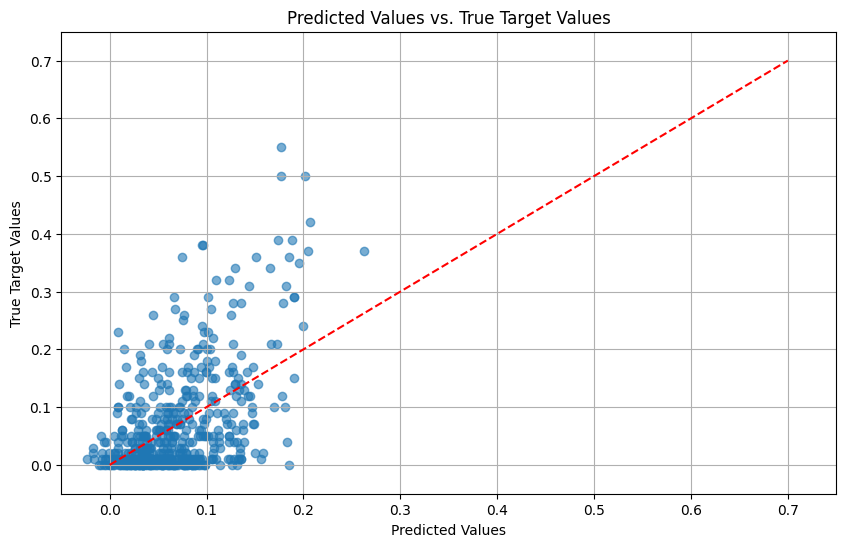

In [6]:
# Prediction
y_pred = model.predict(X_test[top_features])

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on the test set: {rmse:.6f}")
print(f"Mean Absolute Error on the test set: {mae:.6f}")
print(f"R-squared score on the test set: {r2:.6f}")

# Plot True Target Values Against Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.6)  # Inverted axes: predicted on x, true on y
plt.plot([0, 0.7], [0, 0.7], 'r--')  # Line for perfect prediction

# Set labels and title
plt.xlabel('Predicted Values')
plt.ylabel('True Target Values')
plt.title('Predicted Values vs. True Target Values')
plt.grid(True)

# Set limits using numpy to avoid ambiguity
plt.xlim(-0.05, 0.75)  # Adjust limits for predicted values
plt.ylim(-0.05, 0.75)  # Adjust limits for true target values

plt.show()